In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data Exploration and Preparation for Regression
- Understand data distribution, relationships, and trends.
- Visualize data using charts and plots.

In [273]:
# Load the dataset from Kaggle (replace the file path with your local file path if needed)
url = "../dataset/social_media_dataset.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom


## Data Cleaning:
- Handle missing values.
- Remove duplicates.
- Address outliers and inconsistencies.

In [274]:
# Check for missing values
df.isnull().sum()


User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

In [275]:
# Check for duplicates
df = df.drop_duplicates()

In [276]:
# drop uneccessary columns
df = df.drop('Dominant_Emotion', axis=1)
df = df.drop('User_ID', axis=1)

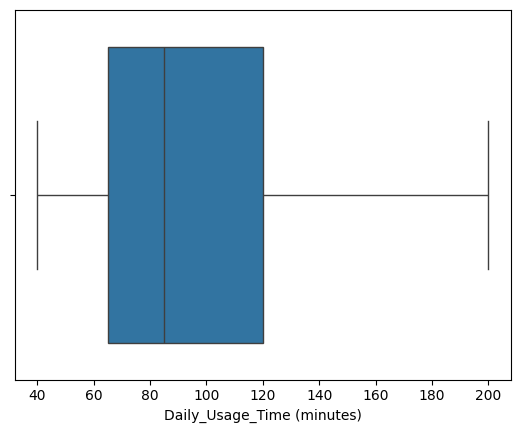

In [277]:
# Checking for outliers in numerical columns (e.g., time spent)
sns.boxplot(x=df['Daily_Usage_Time (minutes)'])
plt.show()

In [278]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Daily_Usage_Time (minutes)'].quantile(0.25)
Q3 = df['Daily_Usage_Time (minutes)'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Daily_Usage_Time (minutes)'] < lower_bound) | (df['Daily_Usage_Time (minutes)'] > upper_bound)]

# Display the outliers
print(outliers)


Empty DataFrame
Columns: [Age, Gender, Platform, Daily_Usage_Time (minutes), Posts_Per_Day, Likes_Received_Per_Day, Comments_Received_Per_Day, Messages_Sent_Per_Day]
Index: []


## Exploratory Data Analysis (EDA)

- Understand distributions of features.
- Visualize relationships between features and target variable (time spent on social media).

In [279]:
# Summary statistics of numerical columns
df.describe()

,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.510000,95.950000,3.321000,39.898000,15.611000,22.560000
std,3.930057,38.850442,1.914582,26.393867,8.819493,8.516274
min,21.000000,40.000000,1.000000,5.000000,2.000000,8.000000
25%,24.000000,65.000000,2.000000,20.000000,8.000000,17.750000
50%,27.500000,85.000000,3.000000,33.000000,14.000000,22.000000
75%,30.250000,120.000000,4.000000,55.000000,22.000000,28.000000
max,35.000000,200.000000,8.000000,110.000000,40.000000,50.000000


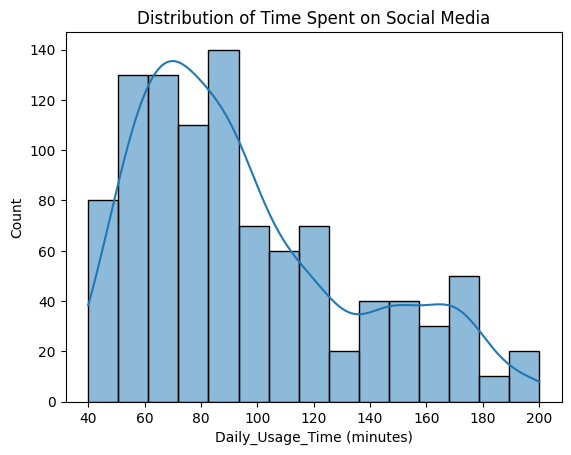

In [280]:
# Visualize distribution of the target variable (time spent on social media)
sns.histplot(df['Daily_Usage_Time (minutes)'], kde=True)
plt.title("Distribution of Time Spent on Social Media")
plt.show()

### Distribution of Age
Next, we will examine the age distribution of users in our dataset. Understanding age distribution is crucial as it offers insights into the demographic characteristics of the users.

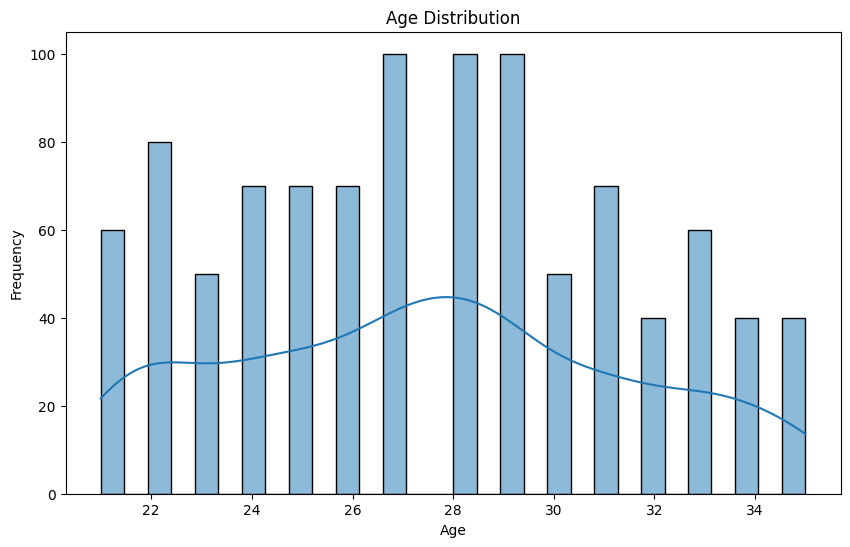

In [281]:
# Plot age distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [146]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

ValueError: could not convert string to float: 'Female'

### Gender Distribution
Let's visualize the distribution of genders in our training set. This will help us understand the gender diversity within our dataset.

In [282]:
# Convert gender values other than female and male to 'Other'
df['Gender'] = df['Gender'].replace('Non-binary', 'Other')

# Check if the replacement was successful
df['Gender'].value_counts()

Gender
Female    370
Male      360
Other     270
Name: count, dtype: int64

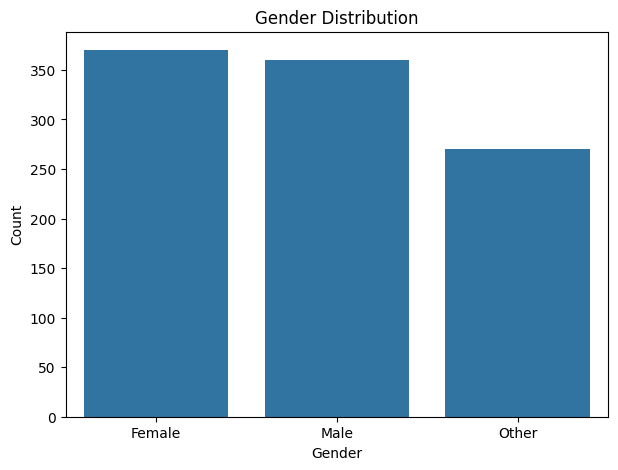

In [283]:
# Plot gender distribution
plt.figure(figsize=(7, 5))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Correlation Matrix

This will help us to visualize the correlation between the target and the features. It will help us which feature is more correlated with the target.

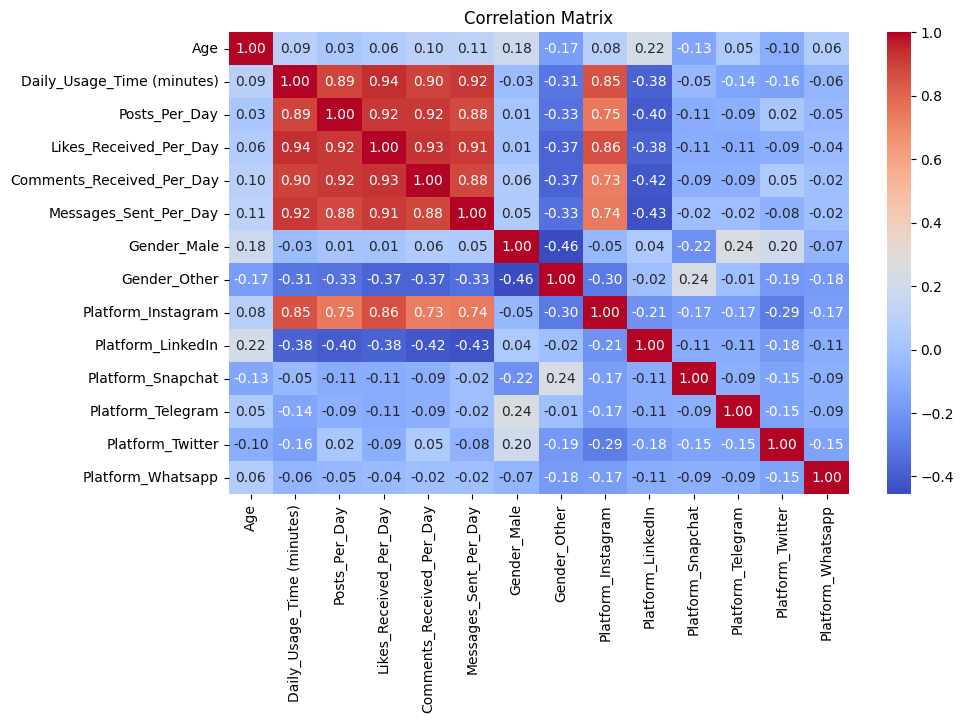

In [284]:
# Convert categorical columns to numeric (e.g., using one-hot encoding)
df_encoded = pd.get_dummies(df, drop_first=True)  # Or use LabelEncoder for specific columns

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

### Daily Usage Time by Platform
Lets analyze how much time users spend on different social media platforms, since it might reveal behavioral patterns. We will see the average daily usage time for each platform.

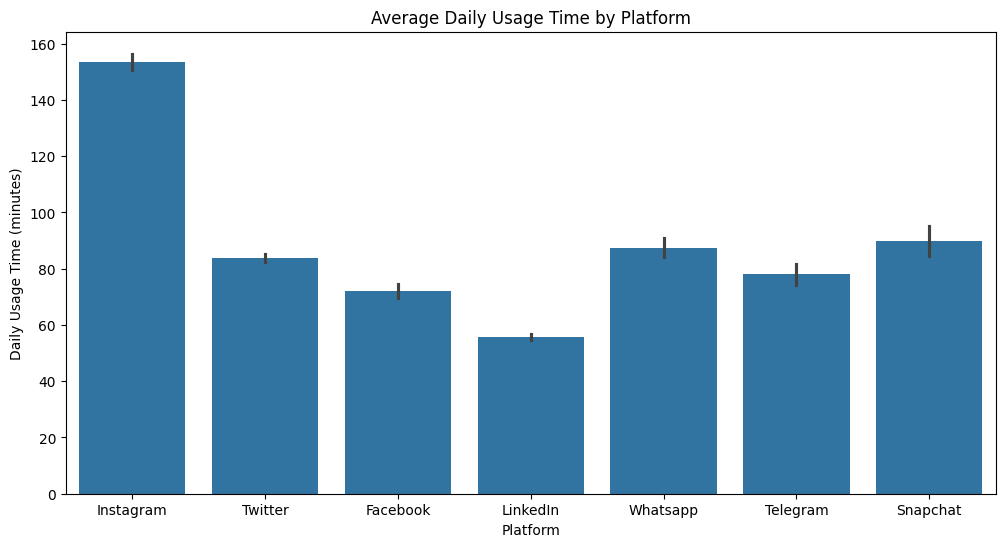

In [285]:
# Plot average daily usage time by platform
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Daily_Usage_Time (minutes)', data=df, estimator=np.mean)
plt.title('Average Daily Usage Time by Platform')
plt.xlabel('Platform')
plt.ylabel('Daily Usage Time (minutes)')
plt.show()

## Feature Engineering:
- Create new features from existing ones.
- Encode categorical variables.
- Scale or normalize numerical features.

In [286]:
# One-hot encode the categorical variables for train, test, and validation sets
df = pd.get_dummies(df, columns=['Gender', 'Platform'], drop_first=True)

# Verify the changes
print("Columns in data:", df.columns)

Columns in data: Index(['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day',
       'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Gender_Male', 'Gender_Other',
       'Platform_Instagram', 'Platform_LinkedIn', 'Platform_Snapchat',
       'Platform_Telegram', 'Platform_Twitter', 'Platform_Whatsapp'],
      dtype='object')


In [287]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
numerical_columns = ['Age', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Messages_Sent_Per_Day', 'Comments_Received_Per_Day'] 

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check the scaled data
df.head()

,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Gender_Male,Gender_Other,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp
0,-0.638987,120,-0.167745,0.193399,-0.636523,-1.240599,False,False,True,False,False,False,False,False
1,0.633896,90,0.877393,-0.754264,1.065106,0.874059,True,False,False,False,False,False,True,False
2,-1.402717,60,-0.690313,-0.943797,-1.203732,-0.300751,False,True,False,False,False,False,False,False
3,0.124743,200,2.445098,2.278259,1.632316,3.223679,False,False,True,False,False,False,False,False
4,1.397625,45,-1.212882,-1.322863,-1.544058,-1.475561,True,False,False,True,False,False,False,False


## Data Splitting:
- Split data into training and test sets.

In [296]:
# Define target variable (y) and features (X)
X = df.drop('Daily_Usage_Time (minutes)', axis=1)  # All features except target
y = df['Daily_Usage_Time (minutes)']  # Target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and testing data
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
X

Training data shape: (800, 13)
Testing data shape: (200, 13)


,Age,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Gender_Male,Gender_Other,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp
0,-0.638987,-0.167745,0.193399,-0.636523,-1.240599,False,False,True,False,False,False,False,False
1,0.633896,0.877393,-0.754264,1.065106,0.874059,True,False,False,False,False,False,True,False
2,-1.402717,-0.690313,-0.943797,-1.203732,-0.300751,False,True,False,False,False,False,False,False
3,0.124743,2.445098,2.278259,1.632316,3.223679,False,False,True,False,False,False,False,False
4,1.397625,-1.212882,-1.322863,-1.544058,-1.475561,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.397625,0.354824,-0.185666,0.271013,-0.535713,False,True,False,False,False,False,True,False
996,-1.402717,-1.212882,-0.981704,-1.090290,-1.475561,False,False,False,False,False,False,False,False
997,1.906779,-0.167745,0.382932,1.065106,0.286654,True,False,False,False,False,False,False,True
998,0.124743,-0.690313,-0.830078,-0.863407,-0.535713,False,True,False,False,False,True,False,False


# Model preparation
## Algorithm Selection
## Model development and Training
## Model Evaluation and Hyperparameter Tuning
## Optimize model performance by fine-tuning hyperparameters using


For the regression problem (predicting time spent on social media), we’ll select an appropriate algorithm. Since this is a regression task, we’ll focus on algorithms that are commonly used for regression problems.

Algorithms to Consider for Regression:
- Linear Regression: A simple and interpretable model. It works well if the relationship between the features and target is approximately linear.
- Random Forest Regressor: A robust ensemble method that can model non-linear relationships and handle large datasets well.
- Gradient Boosting Regressor: Another powerful ensemble method that combines the predictions of several base models to improve performance.

In [289]:
# Import necessary libraries for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into training, validation and testing sets (80% training, 10% testing, and 10% validation)
X_train_lr, X_temp_lr, y_train_lr, y_temp_lr = train_test_split(X, y, test_size=0.2, random_state=42)
X_val_lr, X_test_lr, y_val_lr, y_test_lr = train_test_split(X_temp_lr, y_temp_lr, test_size=0.5, random_state=42)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train_lr, y_train_lr)

# Make predictions
lr_pred = lr_model.predict(X_val_lr)

# Evaluate the model on validation
lr_mse = mean_squared_error(y_val_lr, lr_pred)
lr_rmse = mean_squared_error(y_val_lr, lr_pred, squared=False)
lr_r2 = r2_score(y_val_lr, lr_pred)

# Display the evaluation metrics
print("Linear Regression Performance on validation:")
print(f"MSE: {lr_mse}")
print(f"RMSE: {lr_rmse}")
print(f"R²: {lr_r2}")

# Make predictions
lr_pred = lr_model.predict(X_test_lr)

# Evaluate the model
lr_mse = mean_squared_error(y_test_lr, lr_pred)
lr_rmse = mean_squared_error(y_test_lr, lr_pred, squared=False)
lr_r2 = r2_score(y_test_lr, lr_pred)

# Display the evaluation metrics
print("\nLinear Regression Performance:")
print(f"MSE: {lr_mse}")
print(f"RMSE: {lr_rmse}")
print(f"R²: {lr_r2}")


Linear Regression Performance on validation:
MSE: 86.2700836698289
RMSE: 9.288169016002502
R²: 0.9379869435076994

Linear Regression Performance:
MSE: 113.67687329352424
RMSE: 10.661935719817684
R²: 0.9199598145439268


C:\Users\surafel\Desktop\ML project\ml-classification-regression-project\env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\surafel\Desktop\ML project\ml-classification-regression-project\env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### For Random Forest Regressor, the key hyperparameters we can tune are:

- n_estimators: The number of trees in the forest.
- max_depth: The maximum depth of the trees.
- min_samples_split: The minimum number of samples required to split a node.
- min_samples_leaf: The minimum number of samples required to be at a leaf node.

In [290]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best Parameters for Random Forest Regressor:", grid_search_rf.best_params_)
print("Best Score for Random Forest Regressor:", grid_search_rf.best_score_)

# Train the best model
best_rf_model = grid_search_rf.best_estimator_

# Make predictions with the best model
rf_pred = best_rf_model.predict(X_test)

# Evaluate the tuned Random Forest Regressor
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
rf_r2 = r2_score(y_test, rf_pred)

print("\nTuned Random Forest Regressor Performance:")
print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")
print(f"R²: {rf_r2}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for Random Forest Regressor: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score for Random Forest Regressor: 0.9914529686322533

Tuned Random Forest Regressor Performance:
MSE: 13.268749999999995
RMSE: 3.642629544710798
R²: 0.9906458257603296


C:\Users\surafel\Desktop\ML project\ml-classification-regression-project\env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### For Gradient Boosting Regressor, we can tune the following hyperparameters:

- n_estimators: The number of boosting stages.
- learning_rate: The step size to shrink the contribution of each tree.
- max_depth: The maximum depth of the individual trees.

In [291]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
gb_model = GradientBoostingRegressor(random_state=42)

# Define the hyperparameters grid to search
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Initialize GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search_gb.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best Parameters for Gradient Boosting Regressor:", grid_search_gb.best_params_)
print("Best Score for Gradient Boosting Regressor:", grid_search_gb.best_score_)

# Train the best model
best_gb_model = grid_search_gb.best_estimator_

# Make predictions with the best model
gb_pred = best_gb_model.predict(X_test)

# Evaluate the tuned Gradient Boosting Regressor
gb_mse = mean_squared_error(y_test, gb_pred)
gb_rmse = mean_squared_error(y_test, gb_pred, squared=False)
gb_r2 = r2_score(y_test, gb_pred)

print("\nTuned Gradient Boosting Regressor Performance:")
print(f"MSE: {gb_mse}")
print(f"RMSE: {gb_rmse}")
print(f"R²: {gb_r2}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for Gradient Boosting Regressor: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best Score for Gradient Boosting Regressor: 0.9915025556597545

Tuned Gradient Boosting Regressor Performance:
MSE: 14.261160032145963
RMSE: 3.7763951107035876
R²: 0.9899461987149869


C:\Users\surafel\Desktop\ML project\ml-classification-regression-project\env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Save the best model for deployment

In [292]:
import joblib

joblib.dump(best_rf_model, '../model/social_media/model.pkl')

['../model/model.pkl']

In [297]:
# Save the scaler to a file
joblib.dump(scaler, '../model/social_media/scaler.pkl')

['../model/scaler.pkl']

In [294]:
df

,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Gender_Male,Gender_Other,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp
0,-0.638987,120,-0.167745,0.193399,-0.636523,-1.240599,False,False,True,False,False,False,False,False
1,0.633896,90,0.877393,-0.754264,1.065106,0.874059,True,False,False,False,False,False,True,False
2,-1.402717,60,-0.690313,-0.943797,-1.203732,-0.300751,False,True,False,False,False,False,False,False
3,0.124743,200,2.445098,2.278259,1.632316,3.223679,False,False,True,False,False,False,False,False
4,1.397625,45,-1.212882,-1.322863,-1.544058,-1.475561,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.397625,85,0.354824,-0.185666,0.271013,-0.535713,False,True,False,False,False,False,True,False
996,-1.402717,70,-1.212882,-0.981704,-1.090290,-1.475561,False,False,False,False,False,False,False,False
997,1.906779,110,-0.167745,0.382932,1.065106,0.286654,True,False,False,False,False,False,False,True
998,0.124743,60,-0.690313,-0.830078,-0.863407,-0.535713,False,True,False,False,False,True,False,False
